## Decision Trees

We going to build the decision tree model on our breast cancer diagnosis data and evaluate its performance.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# import the breast cancer diagnosis data 
df = pd.read_csv('https://raw.githubusercontent.com/AmyrMa/INDE-577/main/data/data.csv')
df.head()
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df = df.drop(['id','Unnamed: 32'], axis=1)
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = 1)
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [5]:
pca = decomposition.PCA()
dec_tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca), 
                       ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

# Use Grid Search to find the best parameters

Instead of trying out all the possible parameters, I used grid search to find the best possible parameters including criterion and max_depth.

In [6]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
# Now we are using print statements to print the results. It will give the values of hyperparameters as a result.

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 4
Best Number Of Components: 2

DecisionTreeClassifier(max_depth=4)


In [8]:
# build the tree
optimal = DecisionTreeClassifier(max_depth=8, random_state=1,criterion ='entropy')
# fit the model 
optimal.fit(X_train,y_train)
y_pred = optimal.predict(X_test)

In [9]:
classify_dectree = classification_report(y_test, y_pred)
print("\nClassification Report")
print(classify_dectree)


Classification Report
              precision    recall  f1-score   support

           B       0.98      0.93      0.95        98
           M       0.86      0.96      0.91        45

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



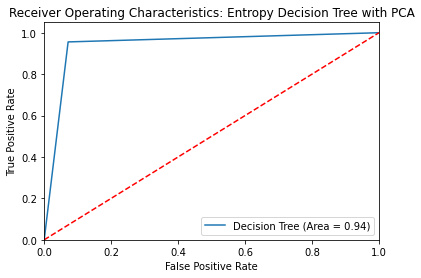

In [10]:
#Plot the ROC curve for the Entropy Decision Tree
encode_y_test = np.where(y_test == 'M', 1, 0)
encode_y_pred = np.where(y_pred == 'M', 1, 0)
roc_auc = roc_auc_score(encode_y_test,encode_y_pred)
fpr, tpr, thresholds = roc_curve(encode_y_test,optimal.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics: Entropy Decision Tree with PCA')
plt.legend(loc="lower right")
plt.show()

Gini Decision Tree with PCA
Nodes: 33
Depth: 6


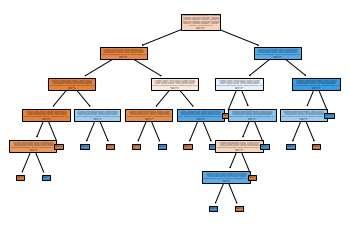

In [11]:
n_nodes = optimal.tree_.node_count
n_nodes

depth = optimal.tree_.max_depth
depth

print('Gini Decision Tree with PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

plot_tree(optimal,filled=True,feature_names=X_test);

## Conclusion
We see that the accuracy of prediction is at 0.94, therefore decision tree is a strong model for this data.